In [371]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2


### From the [Dark Sky API](https://darksky.net/dev/docs#response-format)

* `precipIntensity`: The intensity of precipitation occurring at the given time. This value is conditional on probability (that is, assuming any precipitation occurs at all).
* `precipProbability`: The probability of precipitation occurring, between 0 and 1, inclusive.
* `precipType`: The type of precipitation occurring at the given time. If defined, this property will have one of the following values: "rain", "snow", or "sleet" (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If precipIntensity is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical `precipType` information is usually estimated, rather than observed.)
* `precipAccumulation`: The amount of snowfall accumulation expected to occur (over the hour or day, respectively). (If no snowfall is expected, this property will not be defined.)
* `temperature`: The air temperature.
* `apparentTemperature`: The apparent (or “feels like”) temperature.
* `dewPoint`: The dew point.
* `humidity`: The relative humidity, between 0 and 1, inclusive.
* `windSpeed`: The wind speed.
* `windGust`: The wind gust speed.
* `windBearing`: The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise. (If windSpeed is zero, then this value will not be defined.)
* `uvIndex`: The UV index.
* `cloudCover`: The percentage of sky occluded by clouds, between 0 and 1, inclusive.
* `pressure`: The sea-level air pressure.
* `visibility`: The average visibility, capped at 16.093 Kilometers (10 miles).

SI units are as follows:

* `precipIntensity`: Millimeters per hour.
* `precipAccumulation`: Centimeters.
* `temperature`: Degrees Celsius.
* `apparentTemperature`: Degrees Celsius.
* `dewPoint`: Degrees Celsius.
* `windSpeed`: Meters per second.
* `pressure`: Hectopascals.
* `visibility`: Kilometers.

In [372]:
df = pd.read_csv("../data/weather.csv", index_col=0, parse_dates=True)

In [373]:
df.describe()

,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29567.000000,29567.000000,266.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29443.000000,29251.000000,26867.000000,29512.000000,22844.000000,15072.000000
mean,0.034906,0.035311,0.042020,10.103162,8.749078,6.098258,0.783620,3.571998,3.926338,192.993915,0.728291,8.998252,0.622383,1015.060264
std,0.170882,0.098733,0.120915,7.068134,8.393069,6.015707,0.159837,2.101460,2.739338,89.171872,1.442830,2.218405,0.253200,9.627763
min,0.000000,0.000000,0.002300,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,0.000000,0.000000,0.004825,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.440000,1009.400000
50%,0.000000,0.000000,0.008250,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.800000
75%,0.000000,0.000000,0.019350,15.110000,15.130000,10.860000,0.910000,4.760000,4.890000,260.000000,1.000000,10.003000,0.750000,1021.400000
max,6.925600,1.000000,1.360700,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29567 entries, 2014-01-01 00:00:00+01:00 to 2017-05-16 23:00:00+02:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precip_intensity      29567 non-null  float64
 1   precip_probability    29567 non-null  float64
 2   precip_type           6856 non-null   object 
 3   precip_accumulation   266 non-null    float64
 4   temperature           29567 non-null  float64
 5   apparent_temperature  29567 non-null  float64
 6   dew_point             29567 non-null  float64
 7   humidity              29567 non-null  float64
 8   wind_speed            29567 non-null  float64
 9   wind_gust             29443 non-null  float64
 10  wind_bearing          29251 non-null  float64
 11  uv_index              26867 non-null  float64
 12  visibility            29512 non-null  float64
 13  cloud_cover           22844 non-null  float64
 14  pressure              15072 non

In [375]:
df.head(5)

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2014-01-01 00:00:00+01:00,0.0,0.0,NaN,NaN,1.93,-1.86,-1.06,0.81,3.91,3.91,161.0,0.0,9.988,NaN,NaN
2014-01-01 01:00:00+01:00,0.0,0.0,NaN,NaN,1.94,-2.24,-0.33,0.85,4.56,4.56,140.0,0.0,6.004,NaN,NaN
2014-01-01 02:00:00+01:00,0.0,0.0,NaN,NaN,1.81,-2.14,-0.47,0.85,4.12,4.12,143.0,0.0,9.988,NaN,NaN
2014-01-01 03:00:00+01:00,0.0,0.0,NaN,NaN,1.75,-1.92,-1.16,0.81,3.70,3.70,154.0,0.0,9.988,NaN,NaN
2014-01-01 04:00:00+01:00,0.0,0.0,NaN,NaN,1.72,-2.40,-0.99,0.82,4.36,4.36,149.0,0.0,9.988,NaN,NaN


In [376]:
df.tail(5)

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2017-05-16 19:00:00+02:00,0.0205,0.09,rain,NaN,16.36,16.36,13.87,0.85,1.98,2.17,127.0,NaN,10.003,NaN,NaN
2017-05-16 20:00:00+02:00,0.0000,0.00,NaN,NaN,16.36,16.36,13.71,0.84,1.95,2.04,123.0,NaN,10.003,NaN,NaN
2017-05-16 21:00:00+02:00,0.0000,0.00,NaN,NaN,16.14,16.14,13.81,0.86,2.01,2.01,119.0,NaN,10.003,NaN,NaN
2017-05-16 22:00:00+02:00,0.0000,0.00,NaN,NaN,15.68,15.68,13.20,0.85,2.46,2.46,131.0,0.0,10.003,NaN,NaN
2017-05-16 23:00:00+02:00,0.0000,0.00,NaN,NaN,15.67,15.67,13.35,0.86,1.47,1.68,144.0,0.0,10.003,NaN,NaN


In [377]:
def display_nan_stats(data_frame):
    stats = pd.DataFrame(data_frame.isnull().sum())
    stats.columns = ['NaN values']
    stats['% missing'] = round((stats['NaN values'] / data_frame.shape[0]) * 100, 2)
    return stats

In [378]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,22711,76.81
precip_accumulation,29301,99.10
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_gust,124,0.42


In [379]:
df.loc[df.precip_type.isna()][['precip_probability']].describe()

,precip_probability
count,22711.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [380]:
# If the type of precipitation is NaN, the probability of precipitation is always 0.
# We assume that there was no precipitation and add replace NaN with 'none'.

df.fillna({'precip_type': 'none'}, inplace=True)

In [381]:
# If the probability of precipitation is 0 we also assume that the precipitation accumulation is 0.

condition = (df['precip_accumulation'].isna()) & (df['precip_type'] == 'none')
df.loc[condition, 'precip_accumulation'] = 0.0

In [382]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
precip_accumulation,6590,22.29
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_gust,124,0.42


In [383]:
tmp = df.loc[(df['precip_accumulation'].isna()) & (df['precip_type'] != 'none')]
tmp

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2014-01-01 10:00:00+01:00,0.0519,0.24,rain,NaN,3.75,0.45,2.07,0.89,3.80,3.80,208.0,0.0,10.003,0.75,1010.0
2014-01-01 11:00:00+01:00,0.0679,0.25,rain,NaN,4.68,1.24,2.91,0.88,4.40,4.40,212.0,0.0,10.003,0.75,1010.5
2014-01-02 01:00:00+01:00,0.0180,0.08,rain,NaN,2.83,-1.86,0.81,0.87,5.99,5.99,141.0,0.0,9.988,NaN,NaN
2014-01-02 07:00:00+01:00,0.0325,0.15,rain,NaN,5.13,1.74,3.81,0.91,4.52,4.52,134.0,0.0,10.003,0.75,999.7
2014-01-02 08:00:00+01:00,0.0235,0.08,rain,NaN,5.13,1.76,3.95,0.92,4.46,4.46,137.0,0.0,10.003,0.75,999.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-16 15:00:00+02:00,0.3653,0.43,rain,NaN,14.78,14.78,12.69,0.87,2.88,2.88,140.0,4.0,10.003,0.90,NaN
2017-05-16 16:00:00+02:00,0.0476,0.15,rain,NaN,15.20,15.20,13.21,0.88,1.96,2.14,140.0,4.0,10.003,0.75,NaN
2017-05-16 17:00:00+02:00,0.3552,0.43,rain,NaN,15.47,15.47,13.65,0.89,1.41,2.32,133.0,2.0,7.629,0.90,NaN


In [384]:
tmp[['precip_intensity', 'precip_probability']].describe()

,precip_intensity,precip_probability
count,6590.000000,6590.000000
mean,0.153718,0.154077
std,0.333623,0.156596
min,0.005000,0.010000
25%,0.012000,0.050000
50%,0.029800,0.090000
75%,0.113975,0.160000
max,6.925600,1.000000


<AxesSubplot:xlabel='precip_intensity', ylabel='precip_accumulation'>

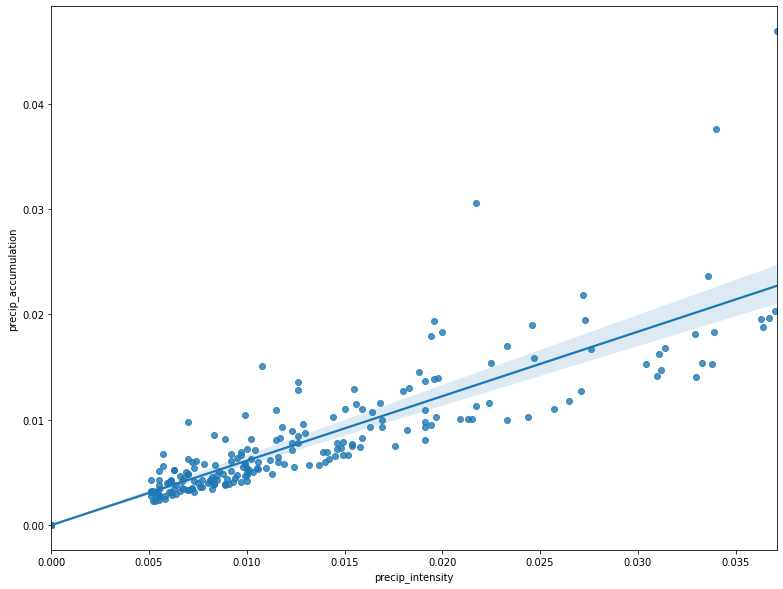

In [385]:
plt.figure(figsize=(13, 10))
tmp = df.loc[df.precip_intensity <= df.precip_intensity.quantile(0.9)]
sns.regplot(data=tmp, x='precip_intensity', y='precip_accumulation')

In [386]:
df.loc[df.precip_accumulation > 0.0]

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2014-01-20 19:00:00+01:00,0.0089,0.06,snow,0.0082,-1.09,-5.38,-2.25,0.92,3.67,3.67,91.0,0.0,6.592,0.75,1009.1
2014-01-20 20:00:00+01:00,0.0055,0.03,snow,0.0051,-1.14,-5.61,-2.66,0.89,3.90,3.90,83.0,0.0,6.592,1.00,1009.1
2014-01-24 01:00:00+01:00,0.0108,0.08,snow,0.0151,-5.12,-11.45,-6.57,0.90,5.19,5.19,101.0,0.0,6.994,0.75,NaN
2014-01-24 02:00:00+01:00,0.0217,0.08,snow,0.0306,-5.23,-11.68,-7.37,0.85,5.34,5.34,101.0,0.0,6.004,0.75,NaN
2014-01-27 06:00:00+01:00,0.0070,0.05,snow,0.0098,-5.08,-11.61,-6.12,0.92,5.52,6.89,134.0,0.0,3.812,0.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-02 09:00:00+01:00,0.0081,0.05,snow,0.0042,0.88,-2.84,-0.11,0.93,3.50,3.50,132.0,0.0,4.298,0.90,NaN
2017-02-03 04:00:00+01:00,0.0119,0.07,snow,0.0058,0.99,-2.60,0.80,0.99,3.35,3.35,117.0,0.0,0.900,1.00,NaN
2017-02-07 14:00:00+01:00,0.0100,0.05,snow,0.0050,0.97,-3.04,-4.15,0.69,3.91,3.91,99.0,1.0,10.003,0.75,NaN


In [387]:
# Use linear regression to predict missing values for 'precip_accumulation'

trainable = df.loc[df.precip_accumulation > 0.0]

# do not use outliers in 'precip_intensity' for prediction
trainable = trainable[['precip_intensity', 'precip_accumulation']].loc[trainable.precip_intensity <= trainable.precip_intensity.quantile(0.75)]

X = trainable.iloc[:, :-1].values
y = trainable.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,0.0042,0.004552
1,0.0054,0.006385
2,0.0071,0.006328
3,0.0057,0.007933
4,0.0181,0.019221
5,0.0038,0.005469
6,0.0194,0.011600
7,0.0105,0.006042
8,0.0075,0.010454
9,0.0036,0.004724


In [388]:
Z = df.loc[df.precip_accumulation.isna()].precip_intensity.values
z_pred = regressor.predict(Z.reshape(-1, 1))
pred_slice = df.loc[df.precip_accumulation.isna()][['precip_intensity']]
pred_slice['precip_accumulation'] = z_pred
df.fillna(pred_slice, inplace=True)

In [389]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
precip_accumulation,0,0.00
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_gust,124,0.42


<AxesSubplot:xlabel='datetime'>

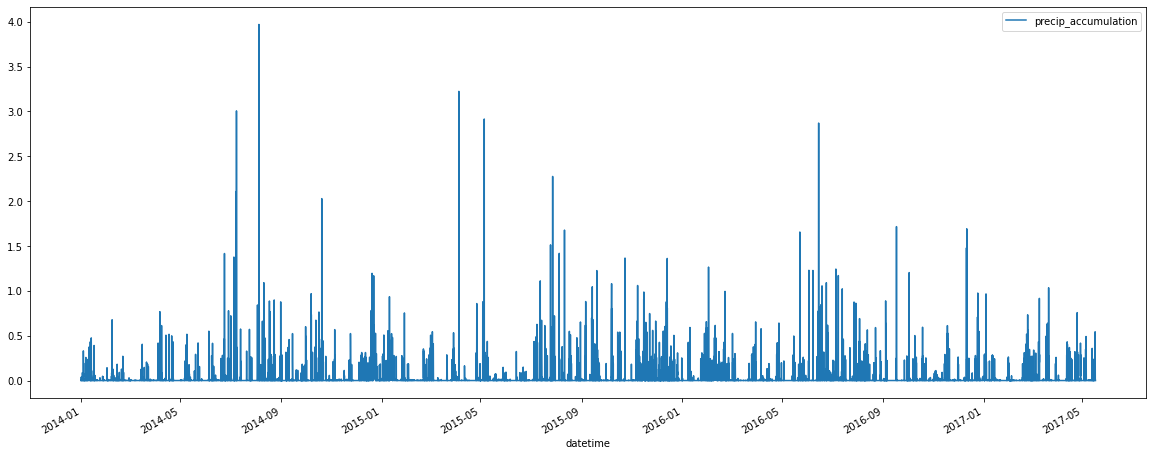

In [390]:
df[['precip_accumulation']].plot(figsize=(20,8))

<AxesSubplot:xlabel='datetime'>

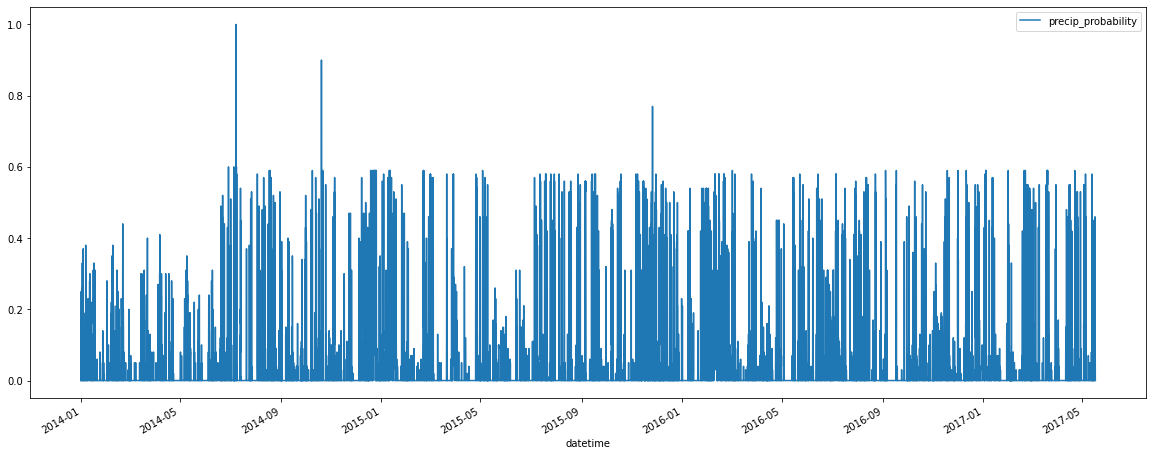

In [391]:
df.plot(y='precip_probability', figsize=(20,8))

<AxesSubplot:ylabel='Count'>

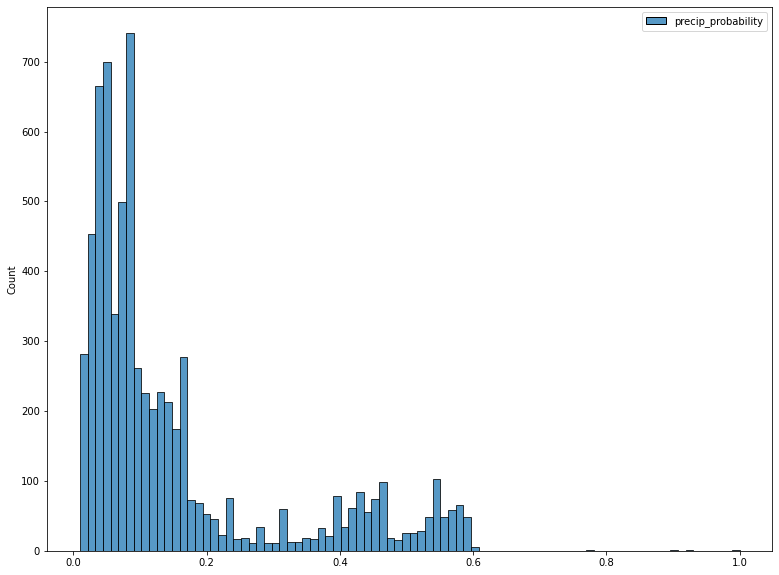

In [392]:
tmp = df.loc[df.precip_probability > 0.0][['precip_probability']]
plt.figure(figsize=(13, 10))
sns.histplot(tmp)

In [393]:
df.interpolate(limit_direction='both', inplace=True)

In [394]:
df.isna().sum()

precip_intensity        0
precip_probability      0
precip_type             0
precip_accumulation     0
temperature             0
apparent_temperature    0
dew_point               0
humidity                0
wind_speed              0
wind_gust               0
wind_bearing            0
uv_index                0
visibility              0
cloud_cover             0
pressure                0
dtype: int64

In [395]:
df.describe()

,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000
mean,0.034906,0.035311,0.020092,10.103162,8.749078,6.098258,0.783620,3.571998,3.924357,193.017131,0.762353,8.997781,0.568927,1015.155621
std,0.170882,0.098733,0.098141,7.068134,8.393069,6.015707,0.159837,2.101460,2.736080,89.208890,1.445420,2.218851,0.270431,9.205041
min,0.000000,0.000000,0.000000,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,0.000000,0.000000,0.000000,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.414000,1010.000000
50%,0.000000,0.000000,0.000000,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.687879
75%,0.000000,0.000000,0.000000,15.110000,15.130000,10.860000,0.910000,4.760000,4.890000,260.500000,1.000000,10.003000,0.750000,1021.138492
max,6.925600,1.000000,3.968860,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


<AxesSubplot:xlabel='precip_intensity'>

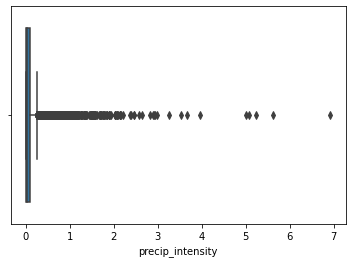

In [396]:
sns.boxplot(x='precip_intensity', data=(df.loc[df['precip_intensity'] > 0.0]))

<AxesSubplot:xlabel='precip_probability'>

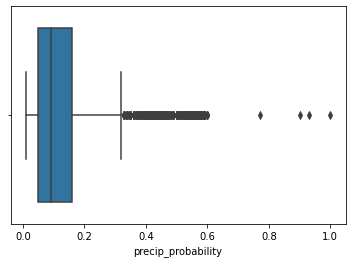

In [397]:
sns.boxplot(x='precip_probability', data=(df.loc[df['precip_probability'] > 0.0]))

<AxesSubplot:xlabel='precip_accumulation'>

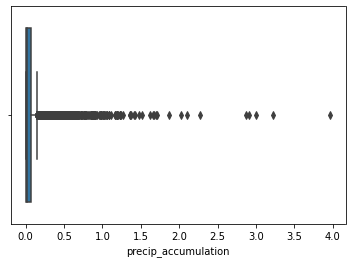

In [398]:
sns.boxplot(x='precip_accumulation', data=(df.loc[df['precip_accumulation'] > 0.0]))

<AxesSubplot:xlabel='temperature'>

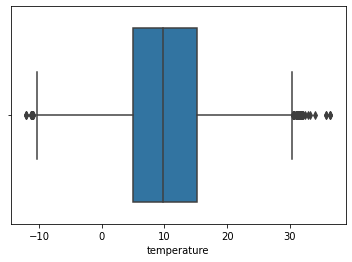

In [399]:
sns.boxplot(x='temperature', data=df)

<AxesSubplot:xlabel='apparent_temperature'>

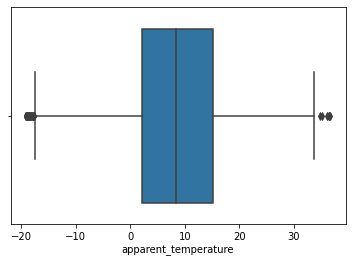

In [400]:
sns.boxplot(x='apparent_temperature', data=df)

In [401]:
df.to_csv("../data/weather_clean.csv", index=False)